In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from numpy import load
import tensorflow as tf

from model.model_architecture import get_model
from eval.config import LOSS
from eval.config import LEARNING_RATE
from eval.config import OPTIMIZER
from eval.config import METRICS

PIXEL_MAPP = {38: [255, 0, 29],
              90: [27, 71, 151],
              101: [201, 19, 223],
              116: [111, 48, 253],
              123: [255, 160, 1],
              127: [137, 126, 126],
              167: [254, 233, 3],
              179: [238, 171, 171]}

GRAY_PIXELS = [38, 90, 101, 116, 123, 127, 167, 179]

In [3]:
def map_binary_masks_to_values(binary_masks, pixel_values, threshold=0.5):
    # Step 1: Threshold the sigmoid output
    binary_masks_thresholded = (binary_masks > threshold).astype(int)

    # Step 2: Identify the predicted class for each pixel
    predicted_classes = np.argmax(binary_masks_thresholded, axis=-1)

    # Step 3: Map the class indices back to the original pixel values
    predicted_values = np.zeros_like(predicted_classes, dtype=int)
    for value, ch in zip(pixel_values, range(len(pixel_values))):
        predicted_values[predicted_classes == ch] = value

    return predicted_values

def create_rgb(img):

    rgb_image = []
    for y in range(256):
        row = []
        for x in range(256):
            map = PIXEL_MAPP[img[y][x]]
            row.append(map)
        
        rgb_image.append(row)

    return np.array(rgb_image)
        

In [4]:
model = get_model()
model.load_weights('./weights/custom_model.h5')

In [5]:
x_test = load('./X_test.npy')
y_test = load('./y_test.npy')

In [6]:
model.compile(loss=LOSS,
                optimizer=OPTIMIZER(learning_rate=LEARNING_RATE), 
                metrics=[METRICS])


x_test_norm = tf.keras.utils.normalize(x_test, axis=1)
report = model.evaluate(x_test_norm, y_test, verbose=1)
print(f"Report after testing: {report}")

4/4 [==============================] - 20s 5s/step - loss: 0.0135 - mean_io_u: 0.8821
Report after testing: [0.01348382979631424, 0.8821099400520325]


##  Showing results on 10 images from test set

1/1 [==============================] - 0s 188ms/step


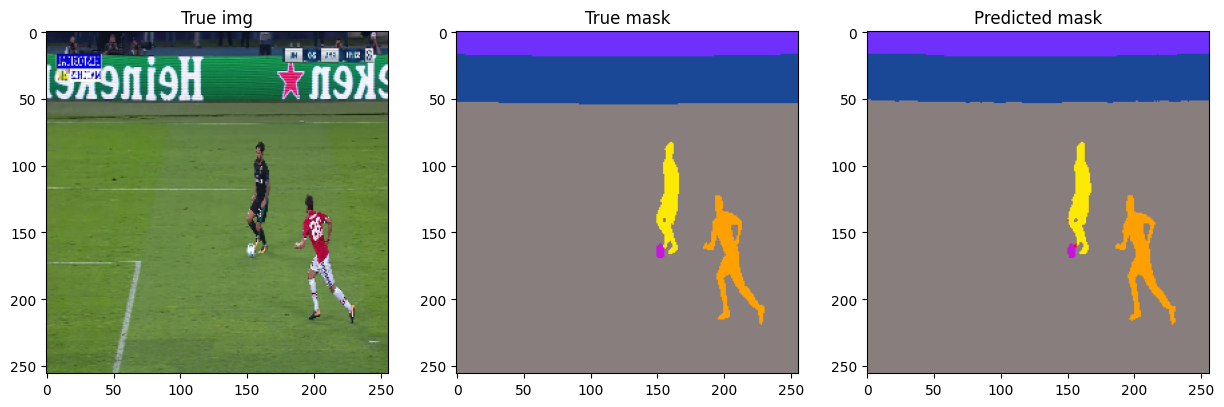

1/1 [==============================] - 0s 186ms/step


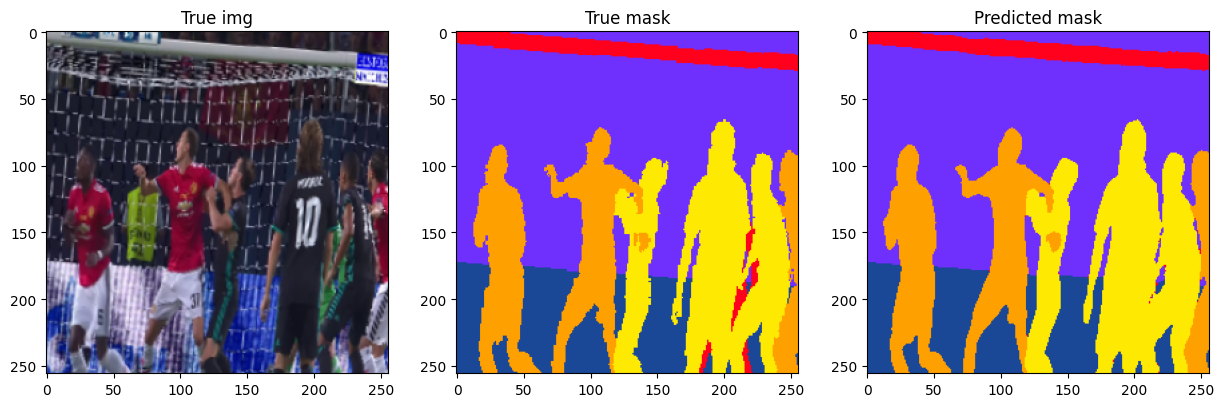

1/1 [==============================] - 0s 189ms/step


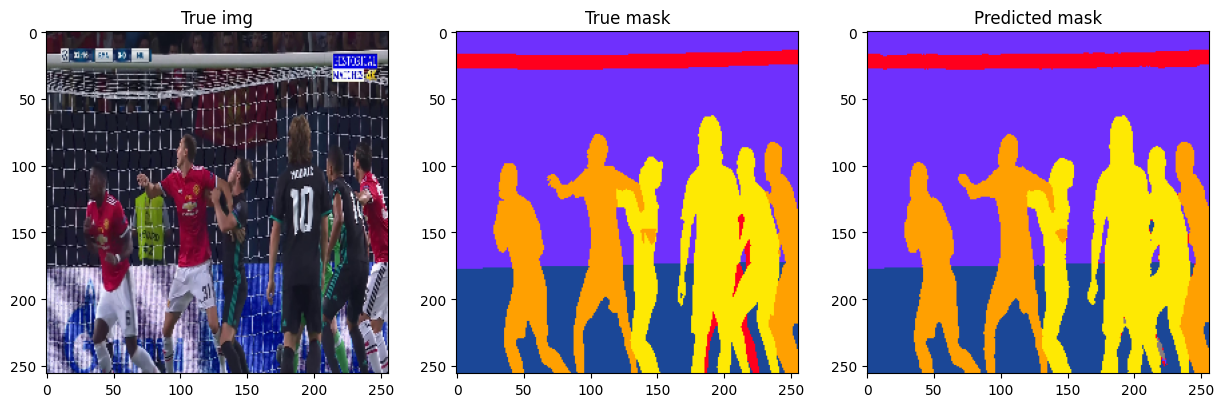

1/1 [==============================] - 0s 187ms/step


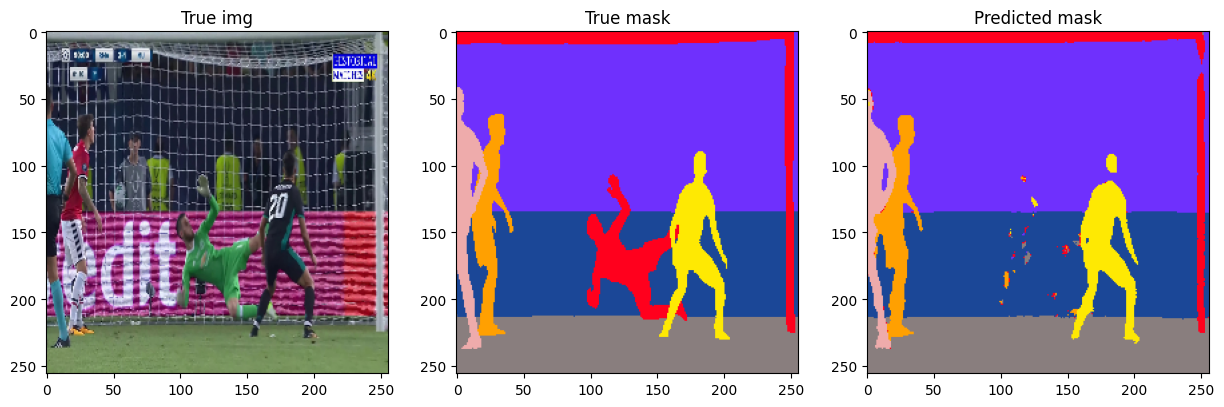

1/1 [==============================] - 0s 185ms/step


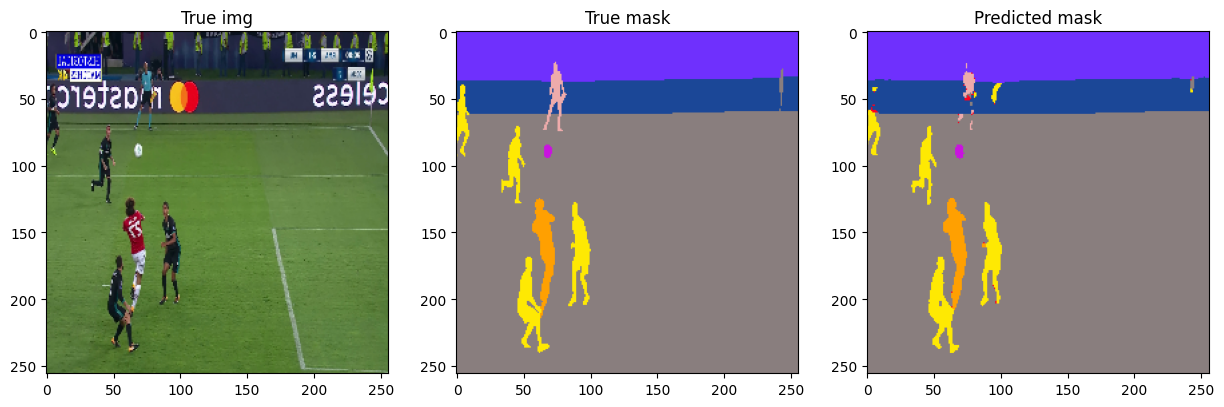

1/1 [==============================] - 0s 183ms/step


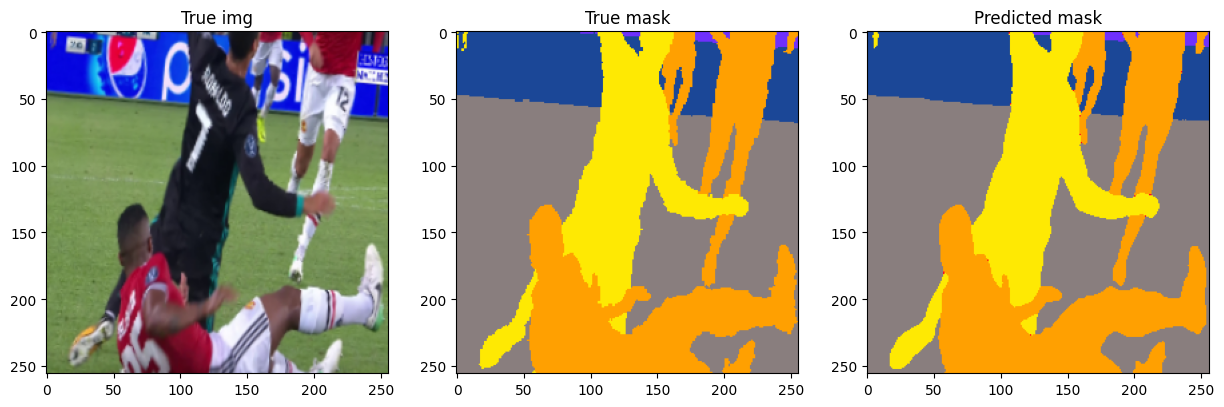

1/1 [==============================] - 0s 182ms/step


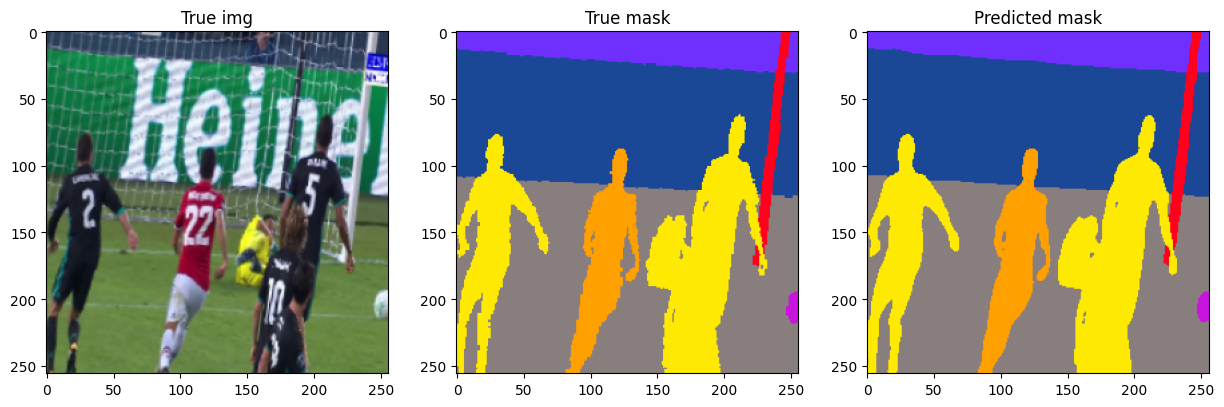

1/1 [==============================] - 0s 182ms/step


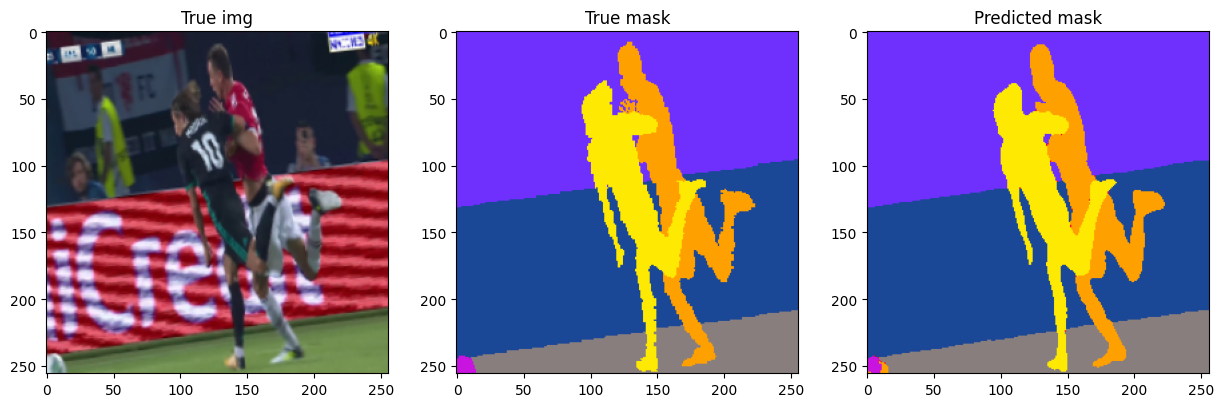

1/1 [==============================] - 0s 191ms/step


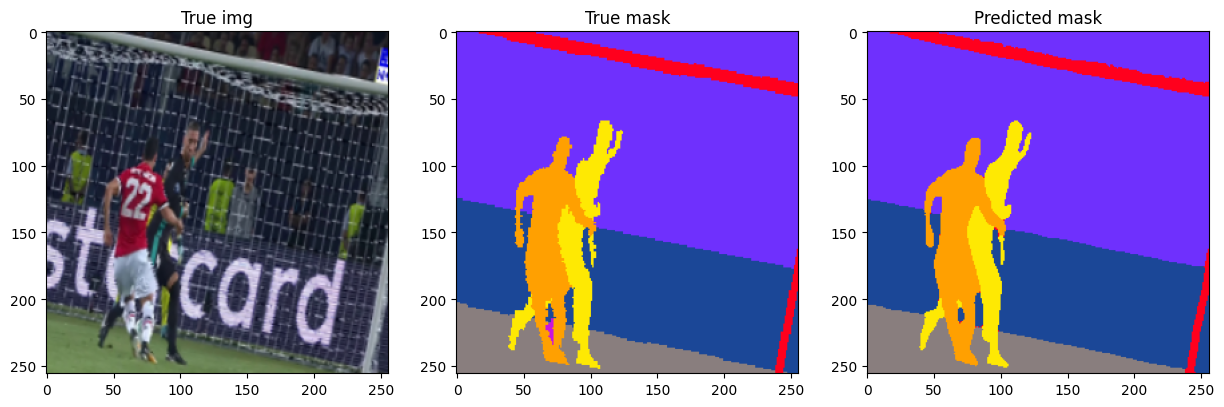

1/1 [==============================] - 0s 184ms/step


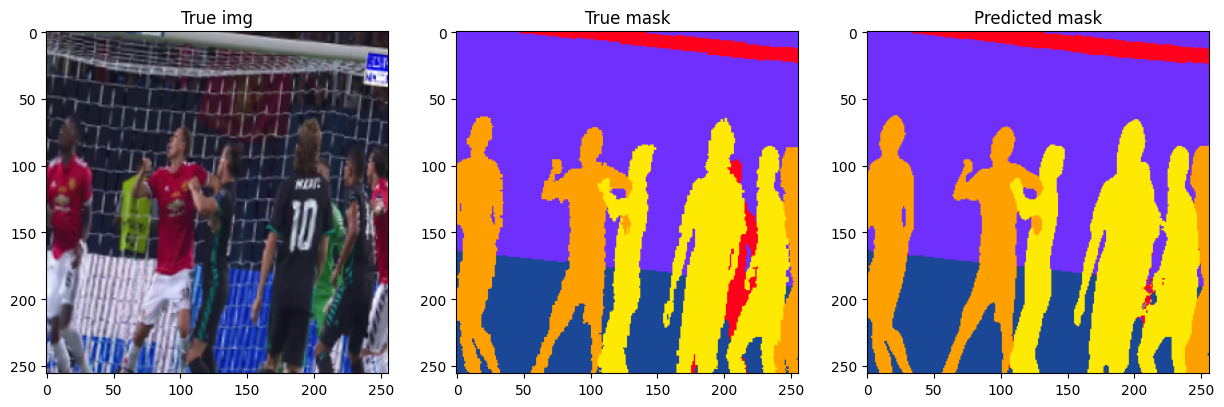

1/1 [==============================] - 0s 185ms/step


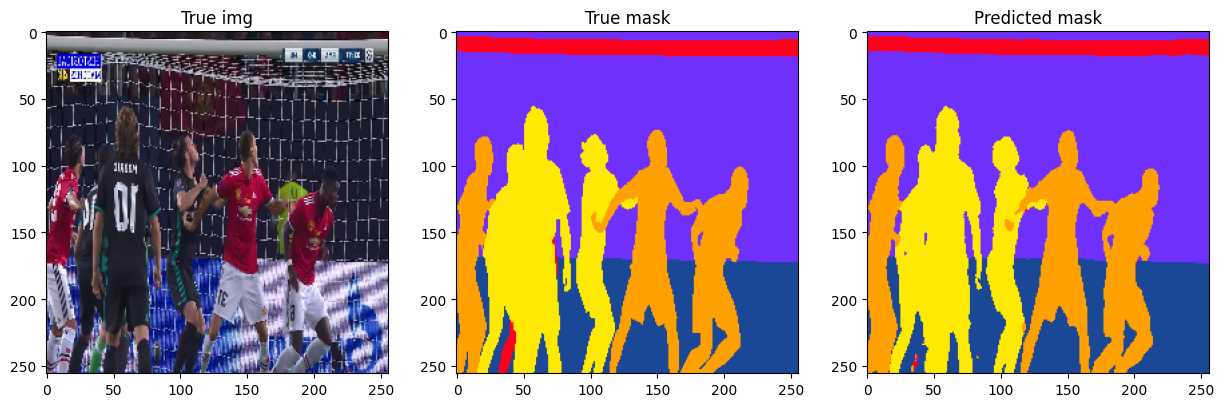

1/1 [==============================] - 0s 195ms/step


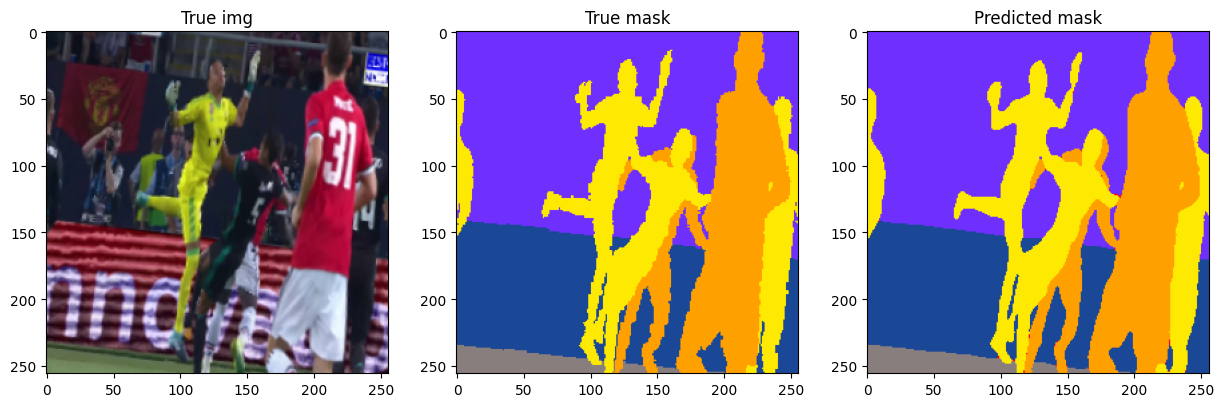

1/1 [==============================] - 0s 185ms/step


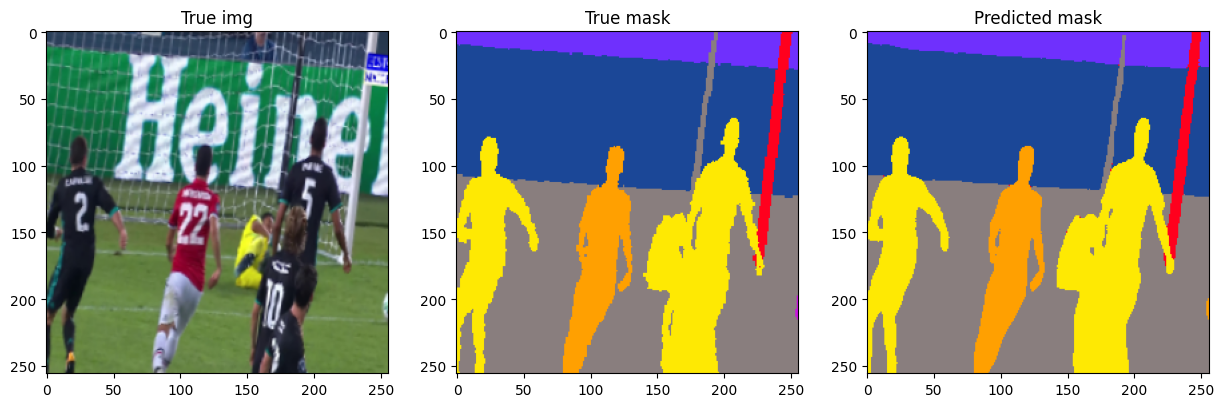

1/1 [==============================] - 0s 199ms/step


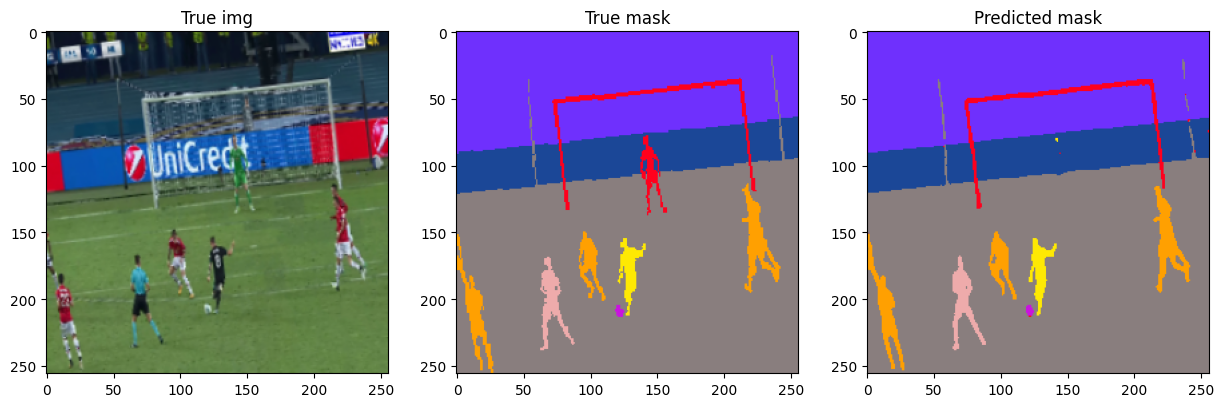

1/1 [==============================] - 0s 180ms/step


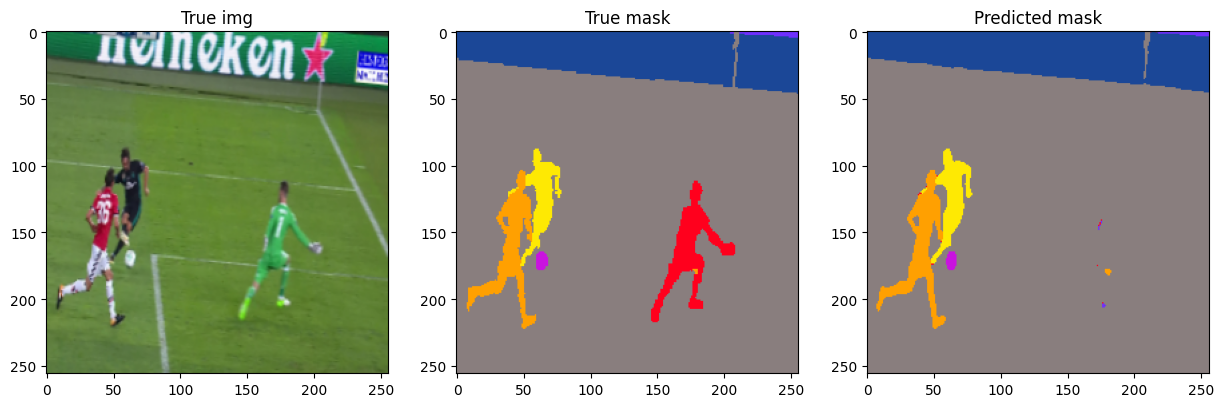

In [8]:
for i in range(15):
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))

    y_pred = model.predict(tf.expand_dims(x_test_norm[i], axis=0))

    predicted_values = map_binary_masks_to_values(y_pred[0], GRAY_PIXELS)
    predicted_rgb = create_rgb(predicted_values)

    true_values = map_binary_masks_to_values(y_test[i], GRAY_PIXELS)
    true_rgb = create_rgb(true_values)

    # Display the first image
    axes[0].imshow(x_test[i])
    axes[0].set_title('True img')

    axes[1].imshow(true_rgb)
    axes[1].set_title('True mask')

    # Display the second image
    axes[2].imshow(predicted_rgb)
    axes[2].set_title('Predicted mask')

    plt.show()